In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

detanet_dir = "/content/drive/MyDrive/Colab Notebooks/DetaNet/code"

if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  import sys

  print('Running on CoLab, mounting google drive...')
  drive.mount('/content/drive')

  base_dir = "/content/drive/MyDrive/Colab Notebooks/CLAMS"
else:
  base_dir = os.getcwd()
  print('Not running on CoLab')

src_dir = os.path.join(base_dir, "src")

sys.path.append(base_dir)
sys.path.append(src_dir)
sys.path.append(detanet_dir)

Running on CoLab, mounting google drive...
Mounted at /content/drive


In [3]:
!pip install dataset
!pip install transformers
!pip install rdkit
!pip install tqdm
!pip install accelerate -U
!pip install e3nn
!pip install torch_geometric
!pip install torch-cluster==1.6.3 -f https://data.pyg.org/whl/torch-2.2.1+cu121.html
!pip install torch-scatter==2.1.2 -f https://data.pyg.org/whl/torch-2.2.1+cu121.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.30
    Uninstalling SQLAlchemy-2.0.30:
      Successfully uninstalled SQLAlchemy-2.0.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.52 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 2.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manyli

In [4]:
import logging
import sys
import warnings
warnings.filterwarnings('ignore')

# Create logger
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Create STDERR handler
handler = logging.StreamHandler(sys.stdout)

# Create formatter and add it to the handler
formatter = logging.Formatter('%(asctime)-15s %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

# Set STDERR handler as the only handler
logger.handlers = [handler]

# Read Data

In [5]:
import json

model_config = {
    'run4': {
        'vit': {
            'num_classes': 37,
            'hidden_size': 288,
            'num_hidden_layers': 9,
            'num_attention_heads': 9,
            'intermediate_size': 576,
            'num_channels': 1,
            'image_size': (66, 66),
            'patch_size': (6, 6),
            'hidden_dropout_prob': 0.1,
            'attention_probs_dropout_prob': 0.1,
            'batch_size': 300,
            'model_dir': os.path.join(base_dir, "models", "vit_models", 'run4')
        },
        'vit_training': {
            'num_epochs': 100,
            'lr': 1e-3,
            'step_size': 1,
            'gamma': 0.975,
            'early_stopping_epochs': 5,
        },
        'ic_training': {
            'batch_size': 300,
            'model_dir': os.path.join(base_dir, "models", "ic_models", 'run4'),
            'num_train_epochs': 120,
            'save_total_limit': 3,
            'max_length': 30,
            'num_beams': 5,
            'early_stopping_patience': 5,
            'canonicalize': True
        }
    },
    'run7': {
        'vit': {
            'num_classes': 18,
            'hidden_size': 288,
            'num_hidden_layers': 9,
            'num_attention_heads': 9,
            'intermediate_size': 576,
            'num_channels': 1,
            'image_size': (66, 66),
            'patch_size': (6, 6),
            'hidden_dropout_prob': 0.1,
            'attention_probs_dropout_prob': 0.1,
            'batch_size': 300,
            'model_dir': os.path.join(base_dir, "models", "vit_models", 'run7')
        },
        'vit_training': {
            'num_epochs': 100,
            'lr': 1e-3,
            'step_size': 1,
            'gamma': 0.975,
            'early_stopping_epochs': 5,
        },
        'ic_training': {
            'batch_size': 300,
            'model_dir': os.path.join(base_dir, "models", "ic_models", 'run7'),
            'num_train_epochs': 120,
            'save_total_limit': 3,
            'max_length': 30,
            'num_beams': 5,
            'early_stopping_patience': 5,
            'canonicalize': False
        },
    },
    'run8': {
        'vit': {
            'num_classes': 18,
            'hidden_size': 288,
            'num_hidden_layers': 9,
            'num_attention_heads': 9,
            'intermediate_size': 576,
            'num_channels': 1,
            'image_size': (60, 60),
            'patch_size': (6, 6),
            'hidden_dropout_prob': 0.1,
            'attention_probs_dropout_prob': 0.1,
            'batch_size': 300,
            'model_dir': os.path.join(base_dir, "models", "vit_models", 'run8')
        },
        'vit_training': {
            'num_epochs': 100,
            'lr': 1e-3,
            'step_size': 1,
            'gamma': 0.975,
            'early_stopping_epochs': 5,
        },
        'ic_training': {
            'batch_size': 300,
            'model_dir': os.path.join(base_dir, "models", "ic_models", 'run8'),
            'num_train_epochs': 120,
            'save_total_limit': 3,
            'max_length': 30,
            'num_beams': 5,
            'early_stopping_patience': 5,
            'canonicalize': False
        },
    },
}

with open(os.path.join(base_dir, "configs/model_config.json"), "w") as f_hd:
    json.dump(model_config, f_hd)

In [6]:
from ir_dataset import IrDataset
from ir_smarts import SMARTS

run = 'run8'
config = model_config[run]

ds = IrDataset(data_list=None, data_path=os.path.join(base_dir, "data"), \
               use_transmittance=False, ir_only=True, \
               canonicalize=config['ic_training']['canonicalize'], \
               smarts=SMARTS,
               further_remove=[23, 169, 176, 303, 464, 745, 791, 3663, 8195, \
                               8416, 13839, 20761, 20770, 20774, 20784, 20785, \
                               20985, 22712, 22716, 22742, 22748, 22758, 22776, \
                               31672, 122842, 122845, 122852, 122855, 122857, \
                               124370, 124378, 124455, 124521, 125697, 125916, \
                               126030, 126087, 127048, 127051, 127066, 127090, \
                               127092, 127093, 127097, 127123])
ds.load()

2024-06-23 14:14:34,447 rdkit - INFO - Enabling RDKit 2023.09.6 jupyter extensions
2024-06-23 14:14:38,209 numexpr.utils - INFO - NumExpr defaulting to 8 threads.
2024-06-23 14:14:38,557 root - INFO - Loading ir feature data from /content/drive/MyDrive/Colab Notebooks/CLAMS/data/ir_features.pth...
2024-06-23 14:15:38,845 root - INFO - Loading ir label data from /content/drive/MyDrive/Colab Notebooks/CLAMS/data/ir_labels.pth...
2024-06-23 14:15:49,392 root - INFO - Loading uv feature data from /content/drive/MyDrive/Colab Notebooks/CLAMS/data/uv_features.pth...
2024-06-23 14:16:01,396 root - INFO - Loading uv label data from /content/drive/MyDrive/Colab Notebooks/CLAMS/data/uv_labels.pth...
2024-06-23 14:16:09,783 root - INFO - Loading nmr feature data from /content/drive/MyDrive/Colab Notebooks/CLAMS/data/nmr_features.pth...
2024-06-23 14:16:23,205 root - INFO - Loading nmr label data from /content/drive/MyDrive/Colab Notebooks/CLAMS/data/nmr_labels.pth...
2024-06-23 14:16:34,191 root 

In [ ]:
len(ds)

127465

# Prepare Data

In [7]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split

batch_size = config['vit']['batch_size']

# Define the sizes of training, validation, and test sets
train_size = int(0.8 * len(ds))  # 80% of the data for training
val_size = int(0.1 * len(ds))    # 10% of the data for validation
test_size = len(ds) - train_size - val_size  # Remaining for testing

# Use random_split to split the dataset
torch.manual_seed(622)
train_dataset, val_dataset, test_dataset = random_split(ds, [train_size, val_size, test_size])

# You can optionally print the sizes of the splits
logging.info(f"Training set size: {len(train_dataset)}")
logging.info(f"Validation set size: {len(val_dataset)}")
logging.info(f"Testing set size: {len(test_dataset)}")

num_workers = 4
prefetch_factor = 2

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, \
                          num_workers=num_workers, prefetch_factor=prefetch_factor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, \
                        num_workers=num_workers, prefetch_factor=prefetch_factor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

2024-06-23 14:18:10,777 root - INFO - Training set size: 101972
2024-06-23 14:18:10,779 root - INFO - Validation set size: 12746
2024-06-23 14:18:10,781 root - INFO - Testing set size: 12747


In [8]:
from ir_dataset import generate_ic_dataset
import json
from transformers import AutoTokenizer

# Pre-trained tokenizer
pretrained_decodert_dir = "seyonec/PubChem10M_SMILES_BPE_450k"
roberta_tokenizer = AutoTokenizer.from_pretrained(pretrained_decodert_dir)


ic_train_set = generate_ic_dataset(train_dataset, roberta_tokenizer,
                              max_length = config['ic_training']['max_length'])
ic_val_set = generate_ic_dataset(val_dataset, roberta_tokenizer,
                              max_length = config['ic_training']['max_length'])
ic_test_set = generate_ic_dataset(test_dataset, roberta_tokenizer,
                              max_length = config['ic_training']['max_length'])

tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/515 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/165k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/101k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

## Benchmarking

In [9]:
device = torch.device("cpu")
logging.info("Device: %s", device)

2024-06-23 14:18:50,413 root - INFO - Device: cpu


In [10]:
model_chk_point = config['ic_training']['model_dir']
model_chk_point

'/content/drive/MyDrive/Colab Notebooks/CLAMS/models/ic_models/run8'

In [11]:
from metrics import calc_topk, predict_smiles
from transformers import AutoTokenizer, VisionEncoderDecoderModel

clams = VisionEncoderDecoderModel.from_pretrained(model_chk_point)
pretrained_decodert_dir = "seyonec/PubChem10M_SMILES_BPE_450k"
roberta_tokenizer = AutoTokenizer.from_pretrained(pretrained_decodert_dir)

The following encoder weights were not tied to the decoder ['vision_encoder_decoder/encoder', 'vision_encoder_decoder/embeddings', 'vision_encoder_decoder/layernorm', 'vision_encoder_decoder/pooler']
The following encoder weights were not tied to the decoder ['vision_encoder_decoder/encoder', 'vision_encoder_decoder/embeddings', 'vision_encoder_decoder/layernorm', 'vision_encoder_decoder/pooler']
The following encoder weights were not tied to the decoder ['vision_encoder_decoder/encoder', 'vision_encoder_decoder/embeddings', 'vision_encoder_decoder/layernorm', 'vision_encoder_decoder/pooler']


In [ ]:
max_smiles = 0
for item in ic_test_set:
    if len(item['smiles']) > max_smiles:
        max_smiles = len(item['smiles'])

max_smiles

22

## Top-k performance

In [ ]:
import numpy as np


perf, unmatched, y_true, y_pred = calc_topk(clams, roberta_tokenizer, ic_test_set, \
                    topks=[1, 5, 10, 15], num_beams=15, batch_size=100)

logging.info("Performance: %s", perf)

with open(os.path.join(model_chk_point, "unmatched.json"), "w") as fd:
    json.dump(unmatched, fd)

np.save(os.path.join(model_chk_point, "y_true_test.npy"), np.array(y_true))
np.save(os.path.join(model_chk_point, "y_pred_test.npy"), np.array(y_pred))

2024-05-12 03:20:07,858 root - INFO - Generating predictions with 15 return sequences...


Streaming output truncated to the last 5000 lines.
[06:11:04] SMILES Parse Error: unclosed ring for input: 'CC12C3C4CC(C1O)N34'
[06:11:04] SMILES Parse Error: unclosed ring for input: 'CC12C3C4CC(C1O)N23'
[06:11:04] SMILES Parse Error: unclosed ring for input: 'CC12CC3C4C(O)C1N34'
[06:11:04] Explicit valence for atom # 8 O, 3, is greater than permitted
[06:11:04] SMILES Parse Error: unclosed ring for input: 'COCC1C2OC(=O)O1'
[06:11:04] Explicit valence for atom # 7 O, 3, is greater than permitted
[06:11:04] SMILES Parse Error: unclosed ring for input: 'CC1COC12CC1OC2'
[06:11:04] SMILES Parse Error: unclosed ring for input: 'CC1CCOC12CC1OC2'
[06:11:04] SMILES Parse Error: unclosed ring for input: 'CC1CCOC12CC1'
[06:11:04] SMILES Parse Error: unclosed ring for input: 'C1COC12CC1OCC2'
[06:11:04] SMILES Parse Error: unclosed ring for input: 'CC1CCOC12CC1CO2'
[06:11:04] Explicit valence for atom # 4 N, 4, is greater than permitted
[06:11:04] SMILES Parse Error: extra open parentheses for in

2024-05-12 06:11:18,239 root - INFO - Calculating top-1 accuracy...
2024-05-12 06:11:18,300 root - INFO - Calculating top-5 accuracy...
2024-05-12 06:11:18,345 root - INFO - Calculating top-10 accuracy...


[06:11:18] SMILES Parse Error: ring closure 2 duplicates bond between atom 2 and atom 3 for input: 'O=C1C2C2C2C3OC3C12'
[06:11:18] SMILES Parse Error: ring closure 2 duplicates bond between atom 2 and atom 3 for input: 'O=C1C2C2C2OC2C=C1'
[06:11:18] SMILES Parse Error: ring closure 2 duplicates bond between atom 2 and atom 3 for input: 'O=C1C2C2C2OC2C11CC1'
[06:11:18] SMILES Parse Error: ring closure 2 duplicates bond between atom 2 and atom 3 for input: 'O=C1C2C2C2C2OC12'
[06:11:18] SMILES Parse Error: ring closure 2 duplicates bond between atom 2 and atom 3 for input: 'O=C1C2C2C2C3OC2C13'
[06:11:18] SMILES Parse Error: ring closure 2 duplicates bond between atom 2 and atom 3 for input: 'O=C1C2C2C2C=CC12'


2024-05-12 06:11:18,397 root - INFO - Calculating top-15 accuracy...
2024-05-12 06:11:18,450 root - INFO - Performance: {1: 0.33087600972472747, 5: 0.6132852325307819, 10: 0.7050427417457454, 15: 0.7385303113481295}


# Structural Elucidation Examples

In [12]:
import matplotlib.pyplot as plt
from rdkit import Chem
import os

def draw_mols(clams, roberta_tokenizer, ic_test_set, idx, font_size=22,
              grey_scale=False, text="", save_fig=False):

    true_smiles = ic_test_set[idx]['smiles']
    true_mol = Chem.MolFromSmiles(true_smiles)

    pred_smiles = predict_smiles(clams, roberta_tokenizer,
                ic_test_set[idx]['pixel_values'].unsqueeze(0),
                num_beams=15,
                do_sample=False)[0]

    pred_mols = [Chem.MolFromSmiles(smiles) for smiles in pred_smiles]
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # Add the additional text to the upper left corner
    fig.text(0.02, 0.98, text, ha='left', va='top', fontsize=font_size)

    # Draw RDKit molecules and integrate into Matplotlib subplots
    axes[0, 0].set_title(f"Truth: {ic_test_set[idx]['smiles']}",
                  fontsize=font_size,
                  color='black',
                  bbox={'facecolor': 'white', 'edgecolor': 'black'})
    if grey_scale:
        true_mol_img = Chem.Draw.MolToImage(true_mol)
        axes[0, 0].imshow(true_mol_img.convert("L"), cmap='Greys_r')
    else:
        axes[0, 0].imshow(Chem.Draw.MolToImage(true_mol))

    axes[0, 0].axis('off')

    for i in range(1, 6):
        if grey_scale:
            title_color = 'black'
        else:
            title_color = 'green' if Chem.CanonSmiles(pred_smiles[i-1]) == \
                  Chem.CanonSmiles(true_smiles) else 'red'

        if Chem.CanonSmiles(pred_smiles[i-1]) == Chem.CanonSmiles(true_smiles):
            axes[i//3, i%3].set_title(pred_smiles[i-1],
                      fontsize=font_size,
                      bbox={'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round'},
                      color=title_color)
        else:
            axes[i//3, i%3].set_title(f"Pred.{i}:pred_smiles[i-1]",
                    fontsize=font_size,
                    color=title_color)

        if grey_scale:
            pred_mol_img = Chem.Draw.MolToImage(pred_mols[i-1])
            axes[i//3, i%3].imshow(pred_mol_img.convert("L"), cmap='Greys_r')
        else:
            axes[i//3, i%3].imshow(Chem.Draw.MolToImage(pred_mols[i-1]))

        axes[i//3, i%3].set_xticklabels([])
        axes[i//3, i%3].set_yticklabels([])
        axes[i//3, i%3].axis('off')

    plt.tight_layout()

    if save_fig:
        plt.savefig(os.path.join(base_dir, 'figs', f'prediction_{idx}.png'), dpi=300)

    plt.show()

[11:25:07] SMILES Parse Error: unclosed ring for input: 'OC12CC(O)(O)C=C1'


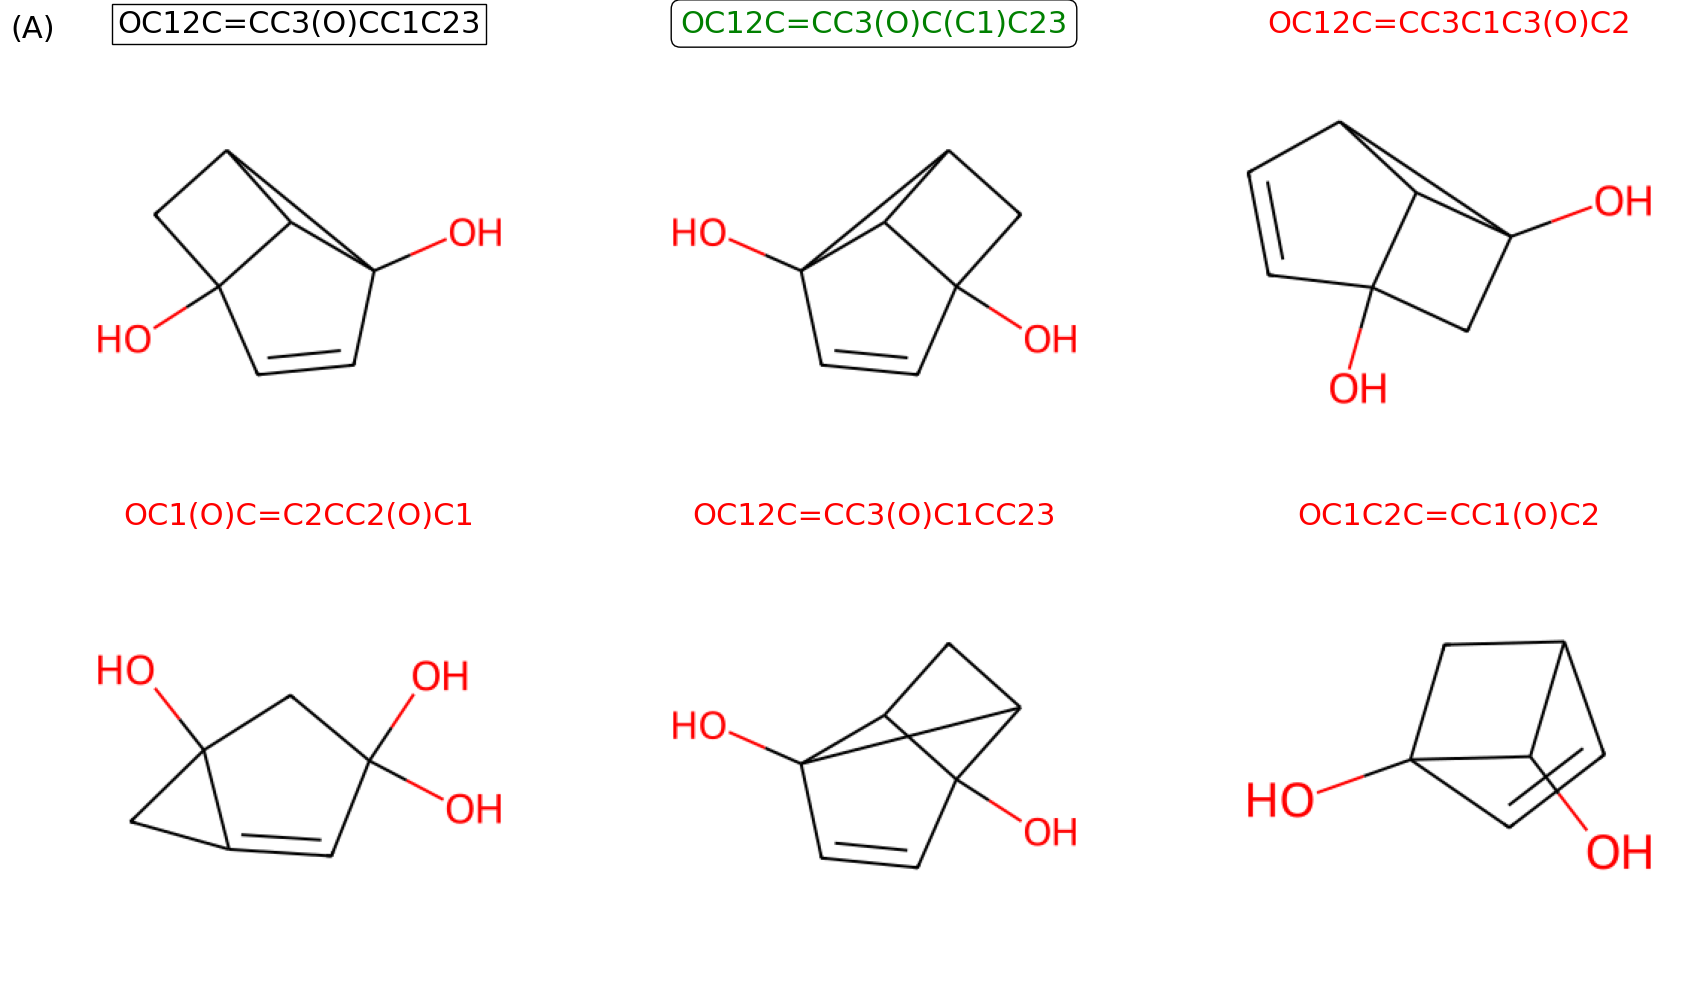

In [ ]:
rand_id = int(torch.randint(0, len(ic_test_set), (1,)))
draw_mols(clams, roberta_tokenizer, ic_test_set, rand_id, text="(A)")

[11:25:23] Explicit valence for atom # 7 C, 5, is greater than permitted


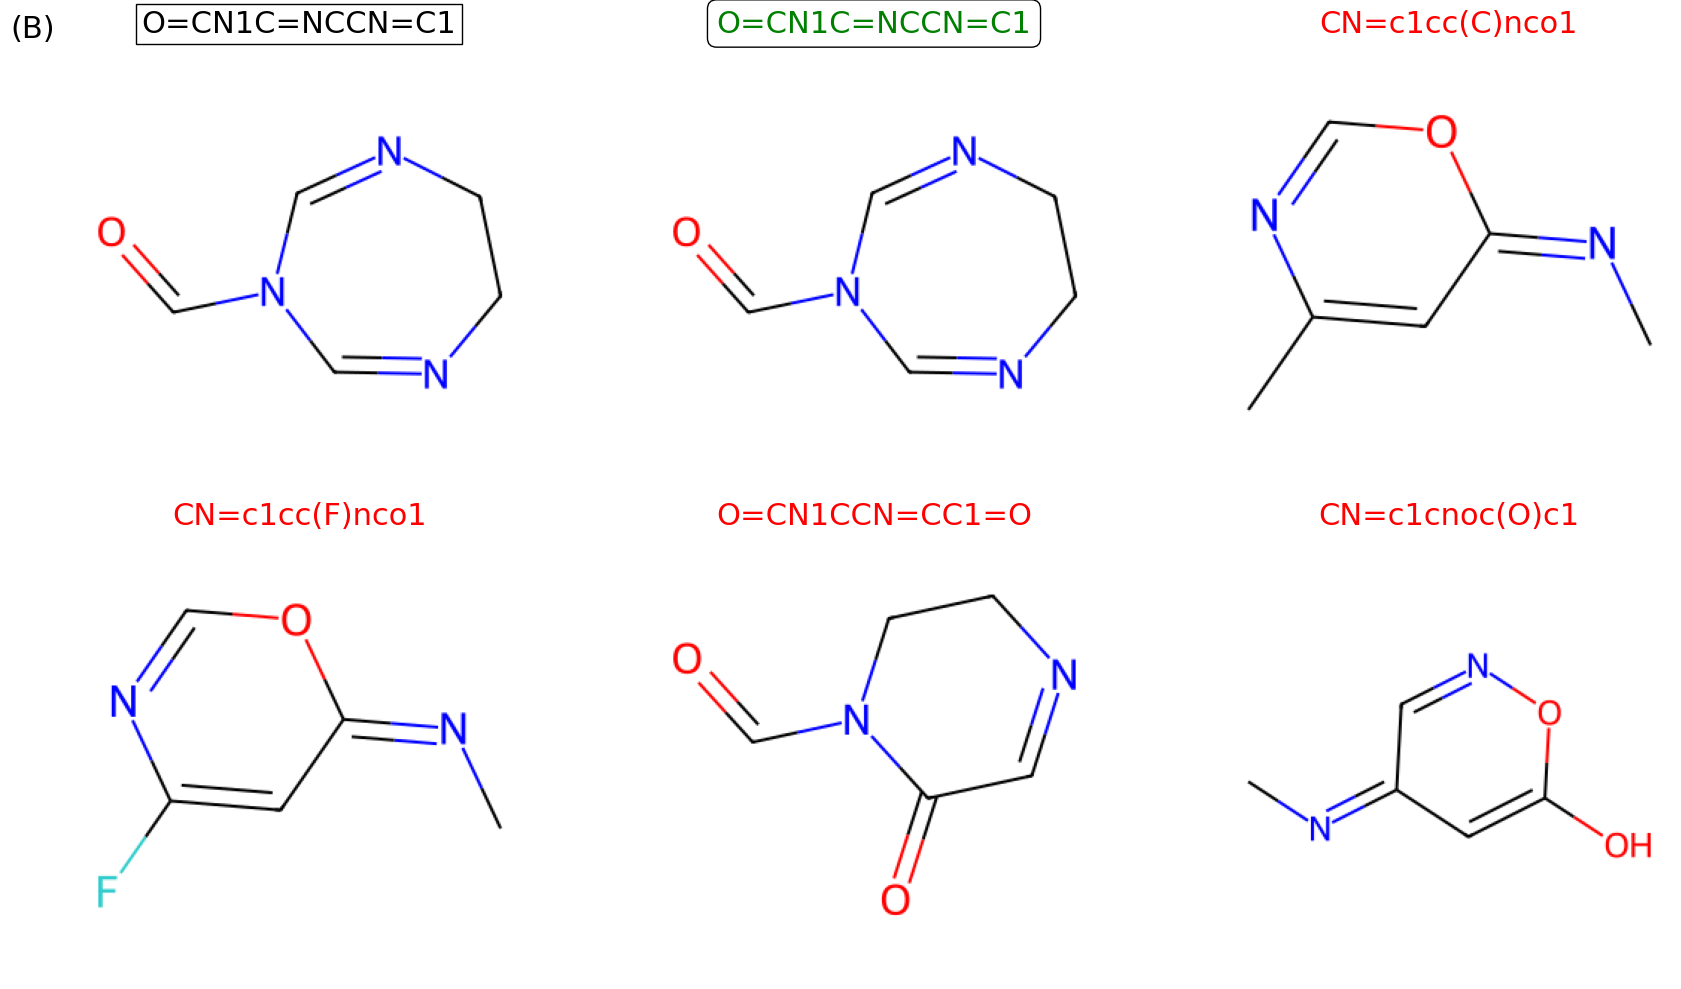

In [ ]:
rand_id = int(torch.randint(0, len(ic_test_set), (1,)))
draw_mols(clams, roberta_tokenizer, ic_test_set, rand_id, text="(B)")

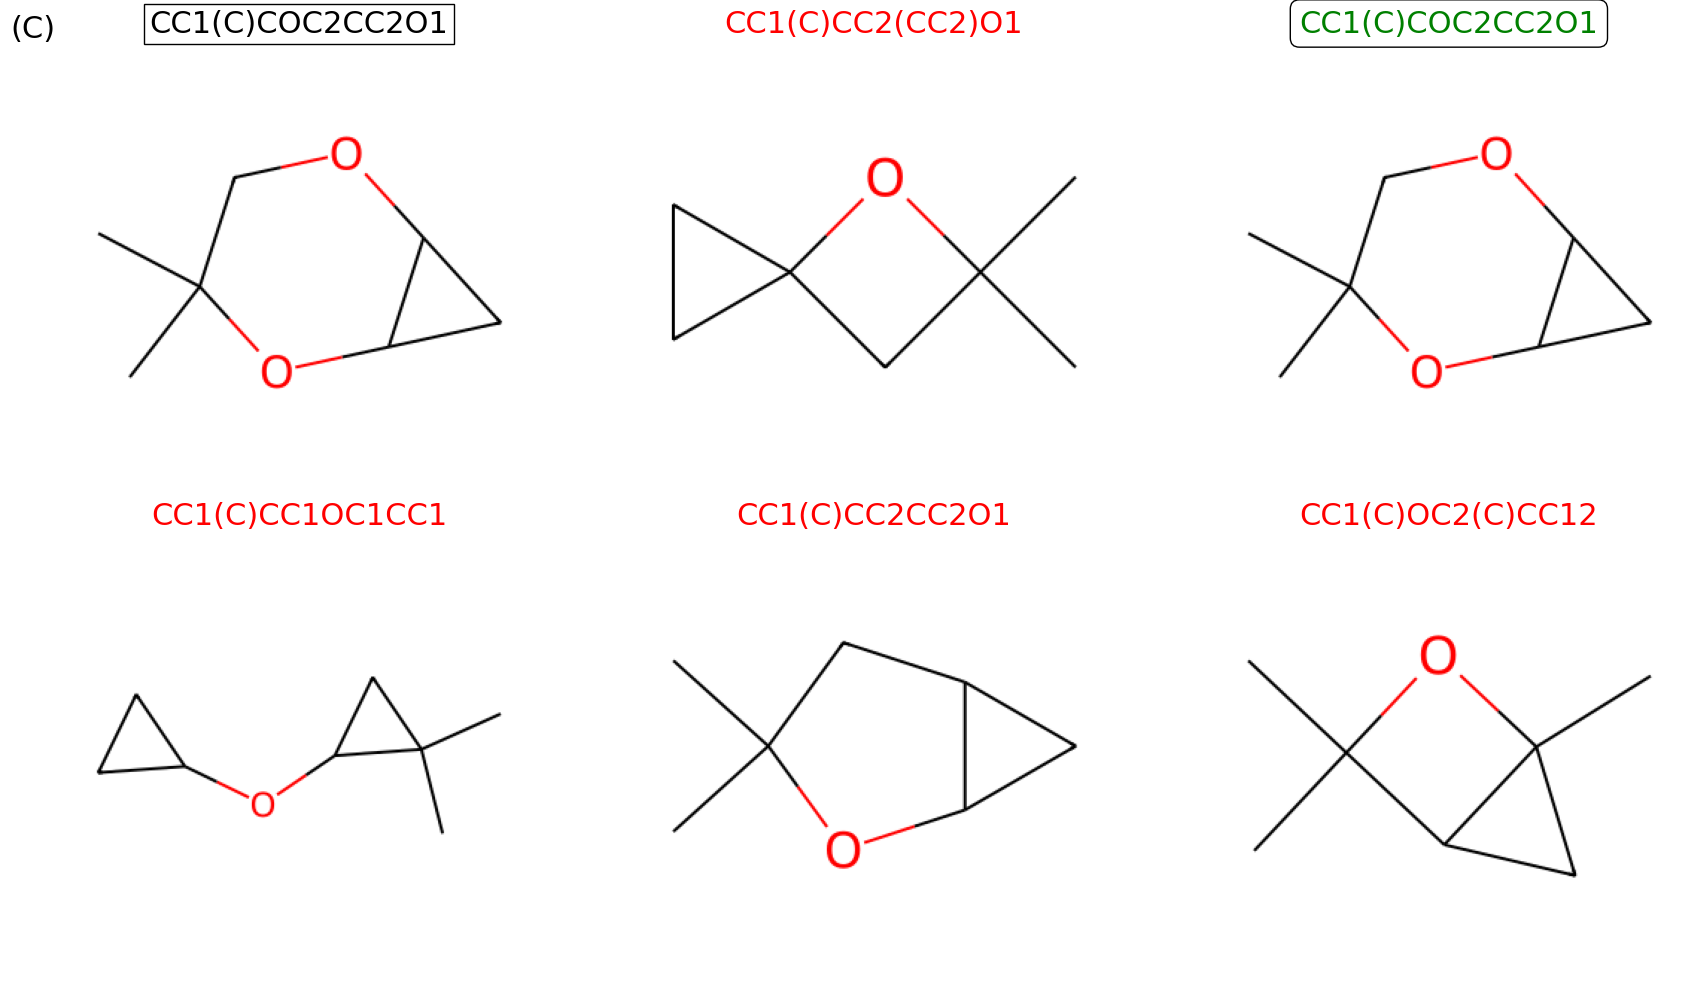

In [ ]:
rand_id = int(torch.randint(0, len(ic_test_set), (1,)))
draw_mols(clams, roberta_tokenizer, ic_test_set, rand_id, text="(C)")

# Heatmap Plots

In [ ]:
from ir_smarts import SMARTS
import pandas as pd
import json


fg_names = list(SMARTS.keys())
model_chk_point = config['ic_training']['model_dir']
unmatched = json.load(open(os.path.join(model_chk_point, "unmatched.json")))['15']

perf_df = pd.DataFrame(columns=['idx', 'smiles'] + fg_names + ['matched'])

loc = 0
for item in test_dataset:
    labels = item[0].numpy().tolist()
    row = [loc, item[1]] + labels + [0 if loc in unmatched else 1]
    perf_df.loc[loc] = row
    loc += 1

perf_df

,idx,smiles,alkane,alkene,alkyne,arene,haloalkane,alcohol,aldehyde,ketone,...,ether,amine,amide,nitrile,imide,thial,phenol,enamine,carbamate,matched
0,0,CC#CC1CC1C(C)C,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,O=CC1C2CC3C2OC13,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
2,2,CC(CCNC=O)C=O,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3,COC1C(C)C1(O)C=O,1,0,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1
4,4,O=C1CCC2=NC=NN12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12742,12742,CCC(=O)C(=N)NC,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
12743,12743,CC(C)C1COC=N1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
12744,12744,N#CC1=NCCCCO1,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
12745,12745,CC(=O)C1C2OC1C=C2,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
perf_df.sum(axis=0)

idx                                                    81236631
smiles        CC#CC1CC1C(C)CO=CC1C2CC3C2OC13CC(CCNC=O)C=OCOC...
alkane                                                    11846
alkene                                                     1635
alkyne                                                     1629
arene                                                        27
haloalkane                                                  217
alcohol                                                    4128
aldehyde                                                   1484
ketone                                                     1434
ester                                                       410
ether                                                      5589
amine                                                      3845
amide                                                       875
nitrile                                                    1541
imide                                   

In [ ]:
# Calculate ratios for each column 'A', 'B', 'C'
ratios = {}

for col in fg_names:
    # Filter rows where column col is equal to 1
    filtered_rows = perf_df[perf_df[col] == 1]

    # Calculate prediction success ratio for molecules by functional groups
    ratio = filtered_rows['matched'].value_counts(normalize=True).get(1, 0)

    # Store the ratio in the dictionary
    ratios[col] = ratio

success_ratio = sorted(ratios.items(), key=lambda x: x[1], reverse=True)
logging.info("Prediction success ratio by functional groups: %s", success_ratio)

2024-06-10 22:55:00,048 root - INFO - Prediction success ratio by functional groups: [('arene', 0.8888888888888888), ('enamine', 0.7655172413793103), ('ester', 0.7560975609756098), ('imide', 0.75), ('phenol', 0.7484472049689441), ('amide', 0.7462857142857143), ('nitrile', 0.7443218689162882), ('alkene', 0.7400611620795107), ('amine', 0.7399219765929779), ('ether', 0.7394882805510825), ('alkane', 0.73805503967584), ('haloalkane', 0.7373271889400922), ('alkyne', 0.7354205033763045), ('alcohol', 0.7349806201550387), ('aldehyde', 0.7297843665768194), ('thial', 0.7297843665768194), ('ketone', 0.7245467224546722), ('carbamate', 0.7058823529411765)]


In [ ]:
success_ratio_df = pd.DataFrame(success_ratio, columns=['Group', 'Score'])
success_ratio_df.to_hdf(
          os.path.join(config['vit']['model_dir'], "success_ratio.h5"),
          key='success_ratio', mode='w')

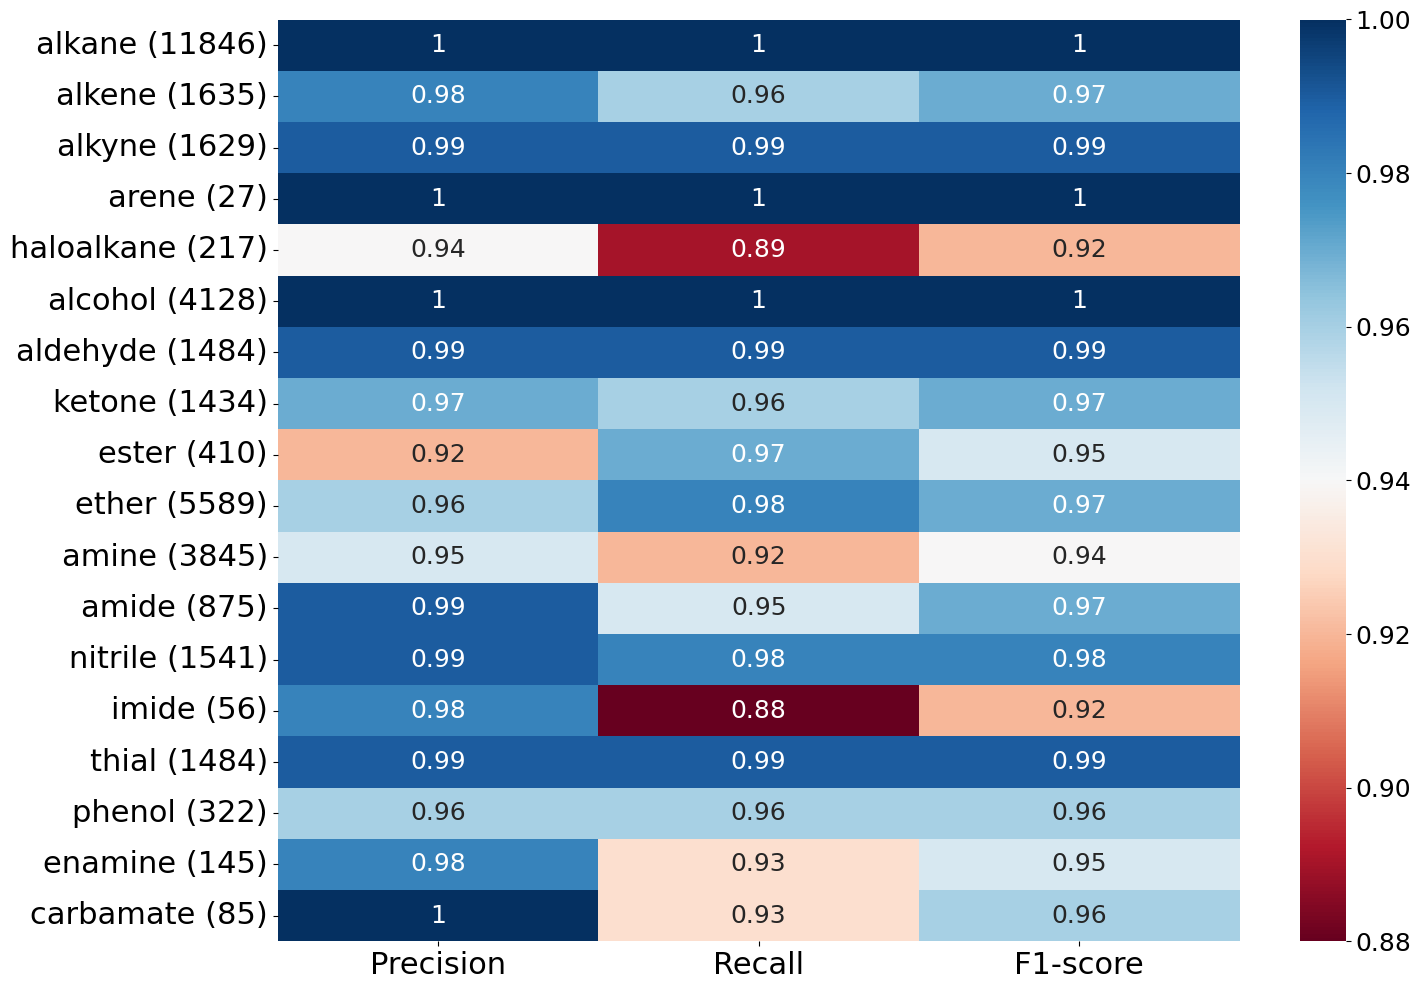

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def plot_classification_report(classification_report,
                title=None, cmap='RdBu', fontsize=22):
    lines = classification_report.split('\n')
    classes = []
    plotMat = []
    support = []
    for line in lines[2 : (len(lines) - 5)]:
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])

        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(classes[idx], sup) for idx, sup in enumerate(support)]
    plt.figure(figsize=(15, 10))
    ax = sns.heatmap(plotMat, annot=True, cmap=cmap, xticklabels=xticklabels,
                yticklabels=yticklabels, annot_kws={"size": 18})

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)

    if title:
        plt.title(title, fontsize=fontsize)

    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()

    plt.savefig(os.path.join(base_dir, 'figs', f'classification_report_{run}.png'), dpi=300)
    plt.show()


with open(os.path.join(config['vit']['model_dir'], f"vit_test_results_{run}.json"), 'r') as fd:
    vit_test_ret = json.load(fd)

plot_classification_report(vit_test_ret['classification_report'])

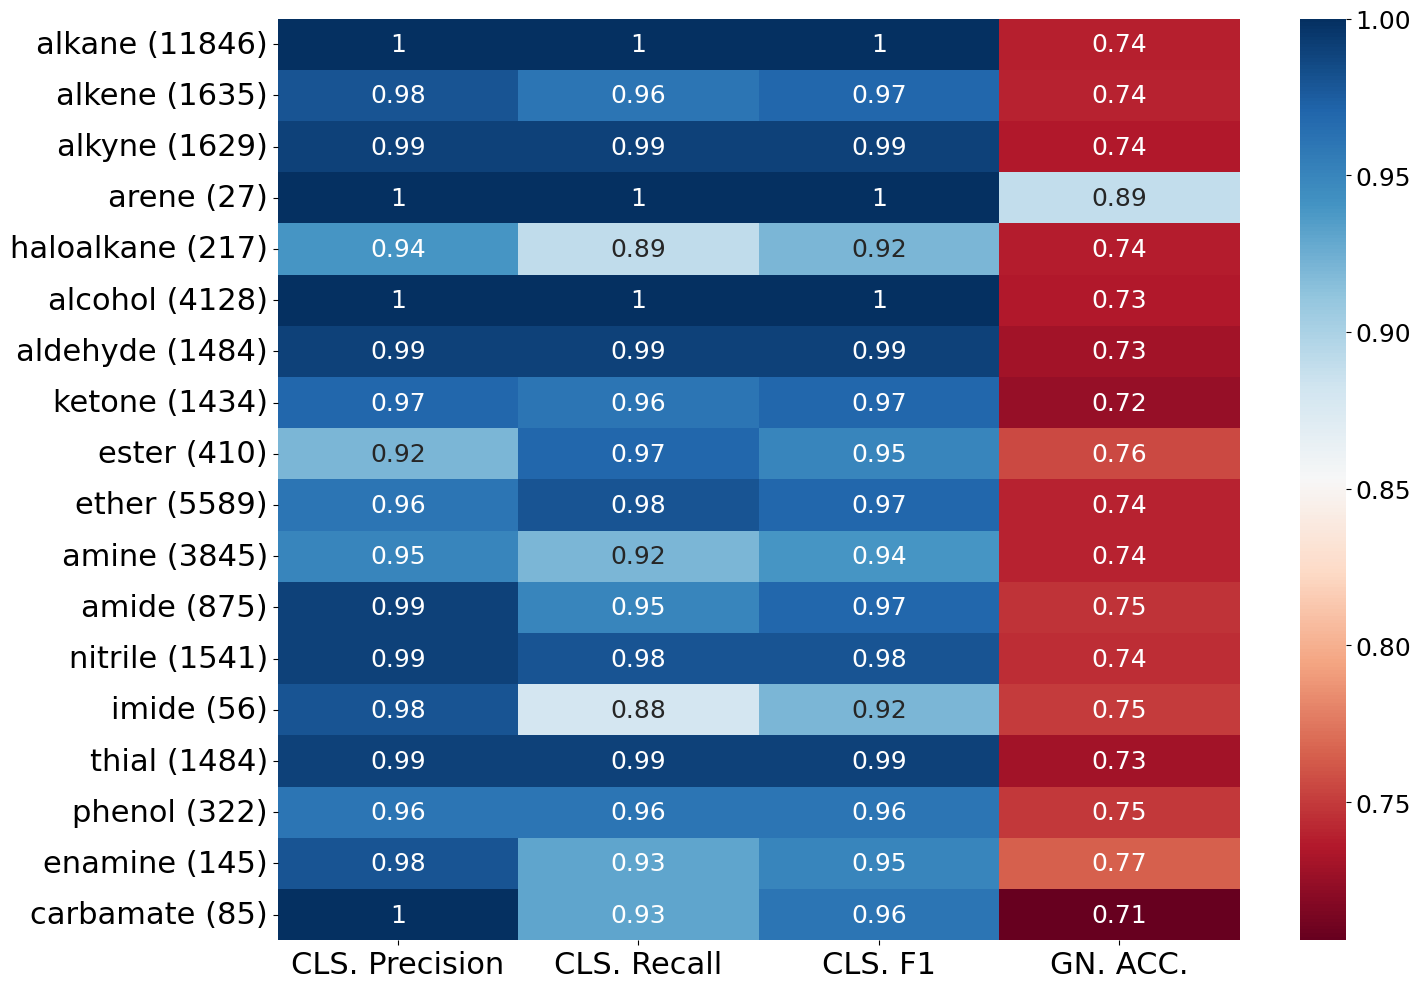

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_classification_report(classification_report, accuracy,
                  title='Classification report', cmap='RdBu', fontsize=22):

    lines = classification_report.split('\n')
    classes = []
    plotMat = []
    support = []
    for line in lines[2 : (len(lines) - 5)]:
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])

        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        plotMat.append(v)

    plotMat = np.array(plotMat)

    # Append accuracy values based on class names
    accuracy_dict = dict(accuracy)
    accuracy_values = [accuracy_dict.get(cls, 0) for cls in classes]
    plotMat = np.column_stack((plotMat, accuracy_values))

    xticklabels = ['CLS. Precision', 'CLS. Recall', 'CLS. F1', 'GN. ACC.']
    yticklabels = ['{0} ({1})'.format(classes[idx], sup) for idx, sup in enumerate(support)]

    plt.figure(figsize=(15, 10))
    ax = sns.heatmap(plotMat, annot=True, cmap=cmap, xticklabels=xticklabels,
                yticklabels=yticklabels, annot_kws={"size": 18})

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)

    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()

    plt.savefig(os.path.join(base_dir, 'figs', f'classification_report_v2_{run}.png'), dpi=300)
    plt.show()

plot_classification_report(vit_test_ret['classification_report'], success_ratio)